# In Class Assignment 2

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

def makeScatterPlot(title, pointsLists, colors):
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
     
    for i, pointsList in enumerate(pointsLists):
        currColor = colors[i]
        for point in pointsList:
            x, y = point
            ax.scatter(x, y, c=currColor)
        
    plt.title(title)
    plt.legend(loc=2)
    plt.show()
    
def getCentroids(clusters):
    centroids = []
    for cluster in clusters:
        currMean = np.array([ sum([point[0] for point in cluster]),
                              sum([point[1] for point in cluster]) ])
        currMean /= float(len(cluster))
        centroids.append(currMean)
    return centroids
    
def kMeans(points, k):
    # Randomly initialize
    result = [[] for i in range(k)]
    for point in points:
        randIndex = random.randint(0, k - 1)
        result[randIndex].append(point)
        
    centroids = getCentroids(result)
    # print cluster
    # centroids = [np.mean(cluster) for cluster in result]  
    # print centroids
    
    # Run algorithm
    seenCentroids = set([])
    hasChanged = True
    while hasChanged:
        hasChanged = False
        newResult = [[] for i in range(k)]
        for i, cluster in enumerate(result):
            for point in cluster:
                closestIndex = np.argmin([
                    np.linalg.norm(point - centroids[j]) for j in range(k)
                ])
                if closestIndex != i:
                    hasChanged = True
                newResult[closestIndex].append(point)
        # Recompute the centroid
        result = newResult
        centroids = getCentroids(result)   
        
        hashVal = str(centroids)
        if hashVal in seenCentroids:
            break
        seenCentroids.add(hashVal)
        
    return result



# Part 1

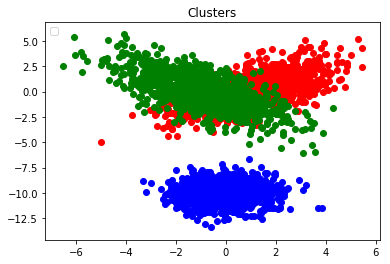

In [3]:

U = np.array([[1/np.sqrt(2), -1/np.sqrt(2)],
              [1/np.sqrt(2), 1/np.sqrt(2)]])
D1 = np.array([[4, 0],
               [0, 1]])
D2 = np.array([[1, 0],
               [0, 5]])

numSamples = 1000
S1 = np.matmul(
        np.matmul(U, D1),
        U.T
)
S2 = np.matmul(
        np.matmul(U, D2),
        U.T
)
S3 = [[1, 0],
      [0, 1]]
mu1 = [1, 0]
mu2 = [-1, 0]
mu3 = [0, -10]

title = "Clusters"
x1, y1 = np.random.multivariate_normal(mu1, S1, numSamples).T
x2, y2 = np.random.multivariate_normal(mu2, S2, numSamples).T
x3, y3 = np.random.multivariate_normal(mu3, S3, numSamples).T
colors = ['r', 'g', 'b']

allPoints = []
pointsLists = []
for xCurr, yCurr in [(x1, y1), (x2, y2), (x3, y3)]:
    pointsLists.append([])
    for i in range(numSamples):
        currPoint = (xCurr[i], yCurr[i])
        allPoints.append(currPoint)
        pointsLists[-1].append(currPoint)

makeScatterPlot(title, pointsLists, colors)

# Part 2

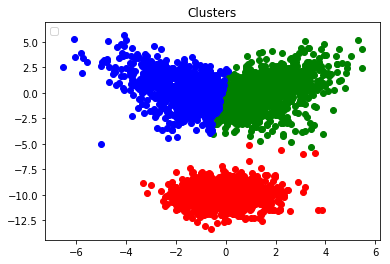

Cluster lengths = [1004, 1072, 924]


In [6]:
k = 3
clusters = kMeans(allPoints, k)
makeScatterPlot(title, clusters, colors)
print "Cluster lengths = {}".format([len(cluster) for cluster in clusters])